In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy.special import logsumexp


In [2]:
def gaussian(x, mu, sigma):
    return 1/sigma /(np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x - mu) ** 2 / (sigma**2))

def mixture(x, means, variances):
    mixture = np.sum([gaussian(x, mean, var) for mean, var in zip(means, variances)], 0)
    mixture = mixture / len(variances)

    return mixture

In [3]:
gt_variances = [.6, .45, .55, .45]
gt_means = [1, 5, 7, 20]

N = 1000
lambda_M = 0.5
M = 4
top_K = 5
noise_level = 1


evenly_spaced_interval = np.linspace(0, 1, M)
colors = [plt.cm.Dark2(x) for x in evenly_spaced_interval]

z_range = np.linspace(-5, 32, N)
density = mixture(z_range, gt_means, gt_variances)

In [4]:
np.random.seed(42)

# Our method

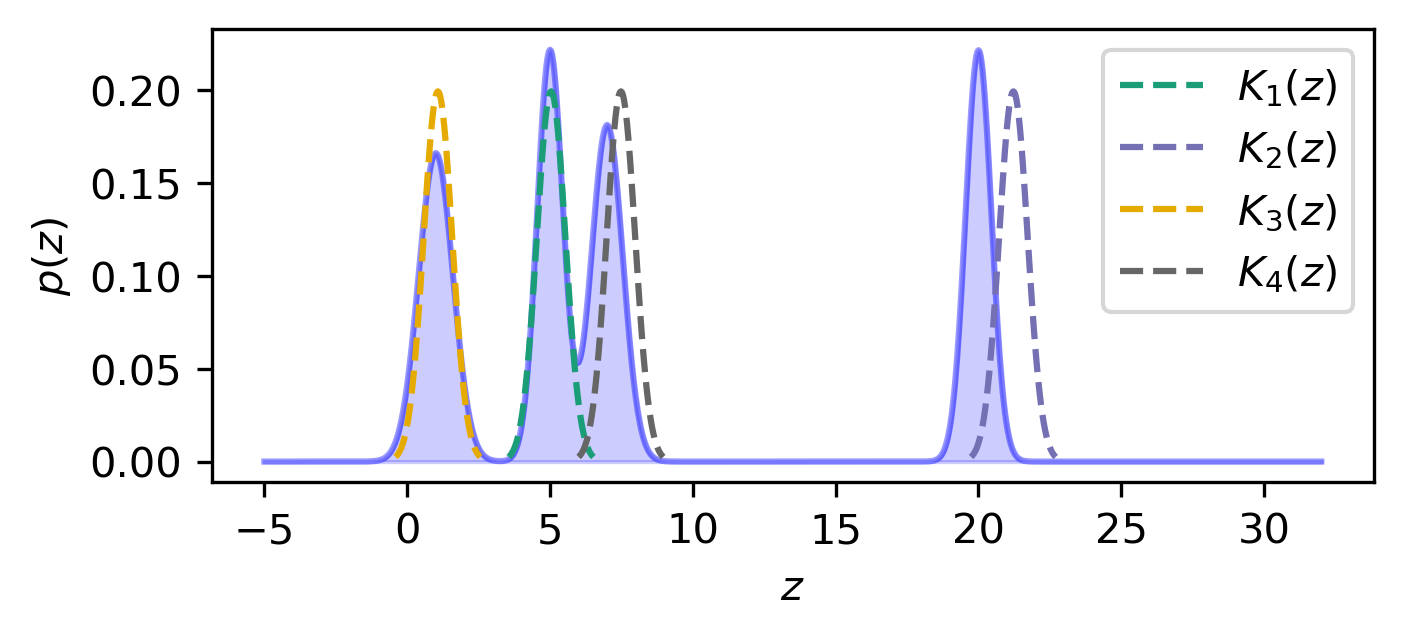

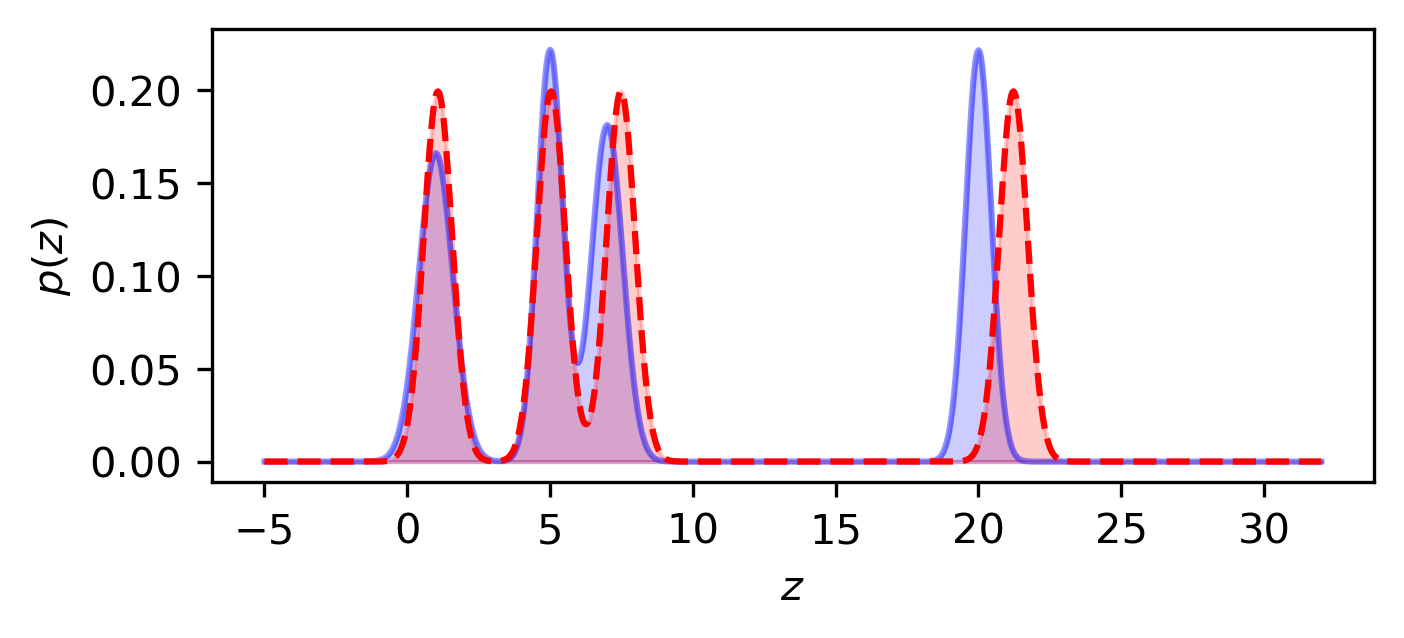

In [5]:
marginal_gains = []
plt.figure(figsize=(5, 2), dpi=300)
plt.fill_between(z_range, 0, density, color='blue', alpha=0.2)
plt.plot(z_range, density, 'blue', alpha=0.4)

plt.xlabel('$z$')
plt.ylabel('$p(z)$')


Z = []
for i in range(M):
    z_vals = []
    for z in z_range:
        likelihood_prior = -np.log(mixture(z, gt_means, gt_variances))
        lse = []
        for z_j in Z:
            lse.append(-lambda_M / M * (z_j - z) ** 2)
        if len(Z) == 0:
            lse = 0
        else:
            lse = logsumexp(lse)
        z_vals.append(likelihood_prior+lse)
    
    z_vals = np.array(z_vals)
    z_vals += noise_level * np.random.randn(z_vals.shape[0])
    ind_sort = np.argsort(z_vals)
    top_10 = ind_sort[:top_K]
    
    new_best = np.random.choice(top_10)
    marginal_gains.append(-z_vals[new_best])

    Z.append(z_range[new_best])

    left = Z[-1] - 3 * lambda_M
    right = Z[-1] + 3 * lambda_M
    z_plot = z_range[(z_range >= left) & (z_range <=right)]
    plt.plot(z_plot, gaussian(z_plot, Z[-1], lambda_M) / M, label='$K_{'f'{i+1}''}(z)$', color=colors[i], linestyle='--')

plt.legend()
plt.savefig('kernels_example.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(5, 2), dpi=300)
plt.fill_between(z_range, 0, density, color='blue', alpha=0.2)
plt.plot(z_range, density, 'blue', alpha=0.4)

plt.fill_between(z_range, 0, mixture(z_range, Z, [lambda_M,] * M), color='red', alpha=0.2)
plt.plot(z_range, mixture(z_range, Z, [lambda_M,] * M), 'r--')
plt.xlabel('$z$')
plt.ylabel('$p(z)$')
plt.savefig('approximation_example.pdf', bbox_inches='tight')
plt.show()

# Naive diversity (pairwise euclidean norm)

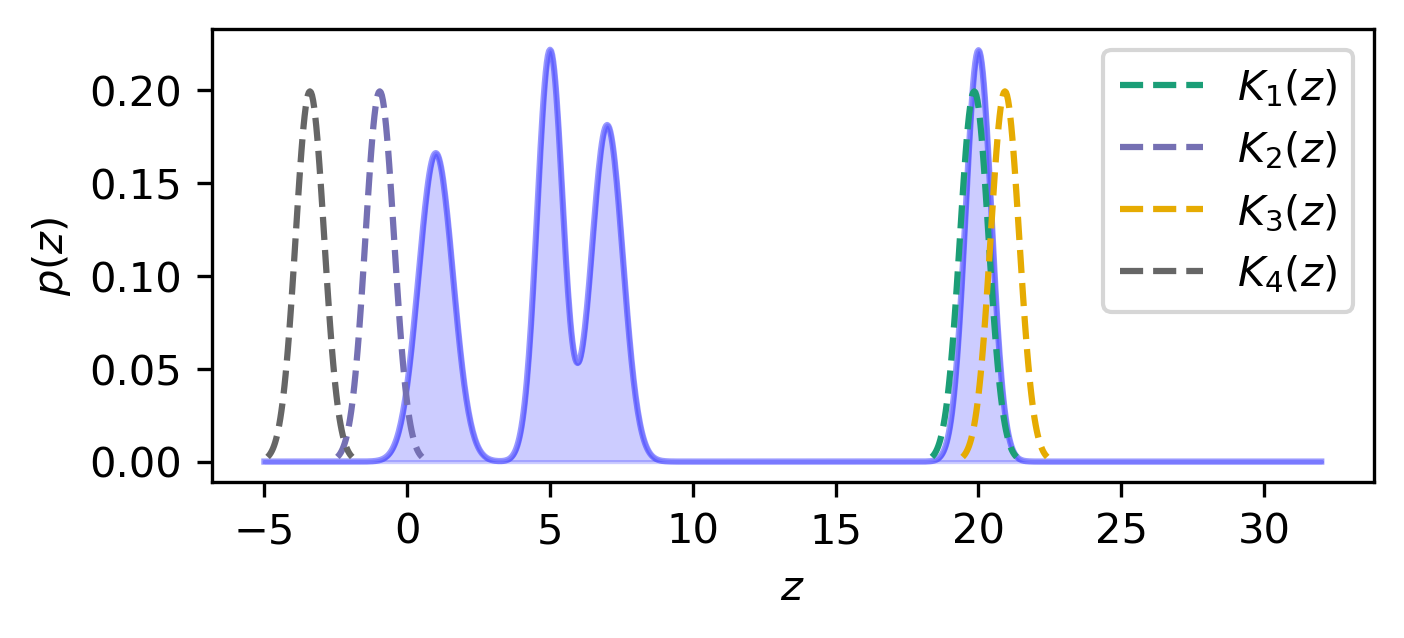

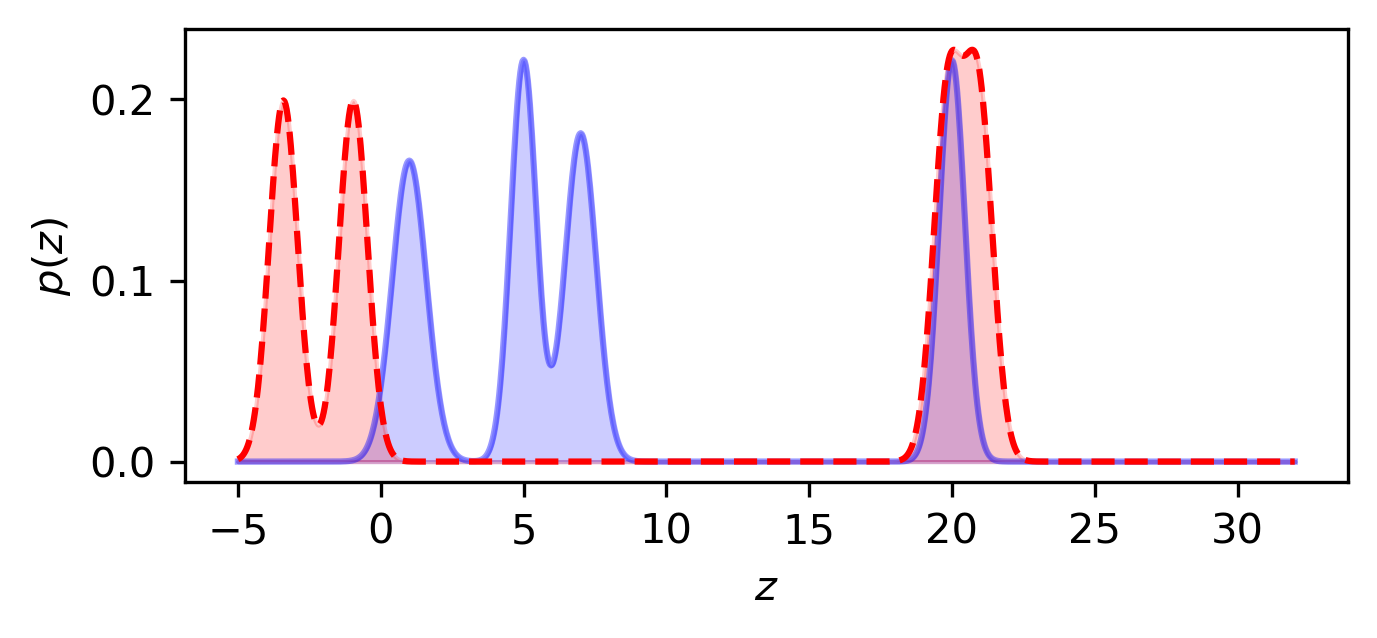

In [6]:
z_range = np.linspace(-5, 32, N)
density = mixture(z_range, gt_means, gt_variances)

marginal_gains = []
plt.figure(figsize=(5, 2), dpi=300)
plt.fill_between(z_range, 0, density, color='blue', alpha=0.2)
plt.plot(z_range, density, 'blue', alpha=0.4)

plt.xlabel('$z$')
plt.ylabel('$p(z)$')


Z = []
for i in range(M):
    z_vals = []
    for z in z_range:
        likelihood_prior = -np.log(mixture(z, gt_means, gt_variances))
        lse = []
        for z_j in Z:
            lse.append(-lambda_M / M * (z_j - z) ** 2)
        if len(Z) == 0:
            lse = 0
        else:
            lse = sum(lse)#logsumexp(lse)
        z_vals.append(likelihood_prior+lse)
    

    
    z_vals = np.array(z_vals)
    z_vals += noise_level * np.random.randn(z_vals.shape[0])
    ind_sort = np.argsort(z_vals)
    top_10 = ind_sort[:top_K]
    new_best = np.random.choice(top_10)
    marginal_gains.append(-z_vals[new_best])

    Z.append(z_range[new_best])

    left = Z[-1] - 3 * lambda_M
    right = Z[-1] + 3 * lambda_M
    z_plot = z_range[(z_range >= left) & (z_range <=right)]
    plt.plot(z_plot, gaussian(z_plot, Z[-1], lambda_M) / M, label='$K_{'f'{i+1}''}(z)$', color=colors[i], linestyle='--')

plt.legend()
plt.savefig('kernels_example_heuristic.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(5, 2), dpi=300)
plt.fill_between(z_range, 0, density, color='blue', alpha=0.2)
plt.plot(z_range, density, 'blue', alpha=0.4)

plt.fill_between(z_range, 0, mixture(z_range, Z, [lambda_M,] * M), color='red', alpha=0.2)
plt.plot(z_range, mixture(z_range, Z, [lambda_M,] * M), 'r--')
plt.xlabel('$z$')
plt.ylabel('$p(z)$')
plt.savefig('approximation_example_heuristic.pdf', bbox_inches='tight')
plt.show()

# Randomized mode picking (Deep Ensembles-like method)

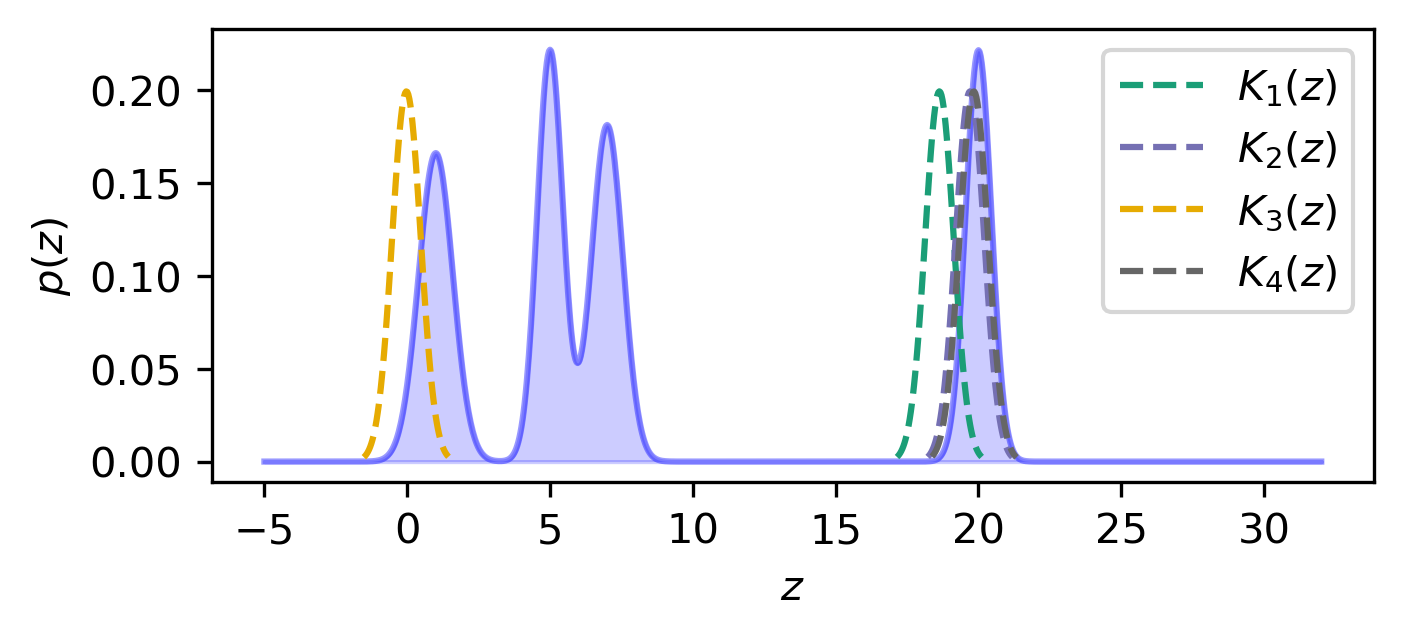

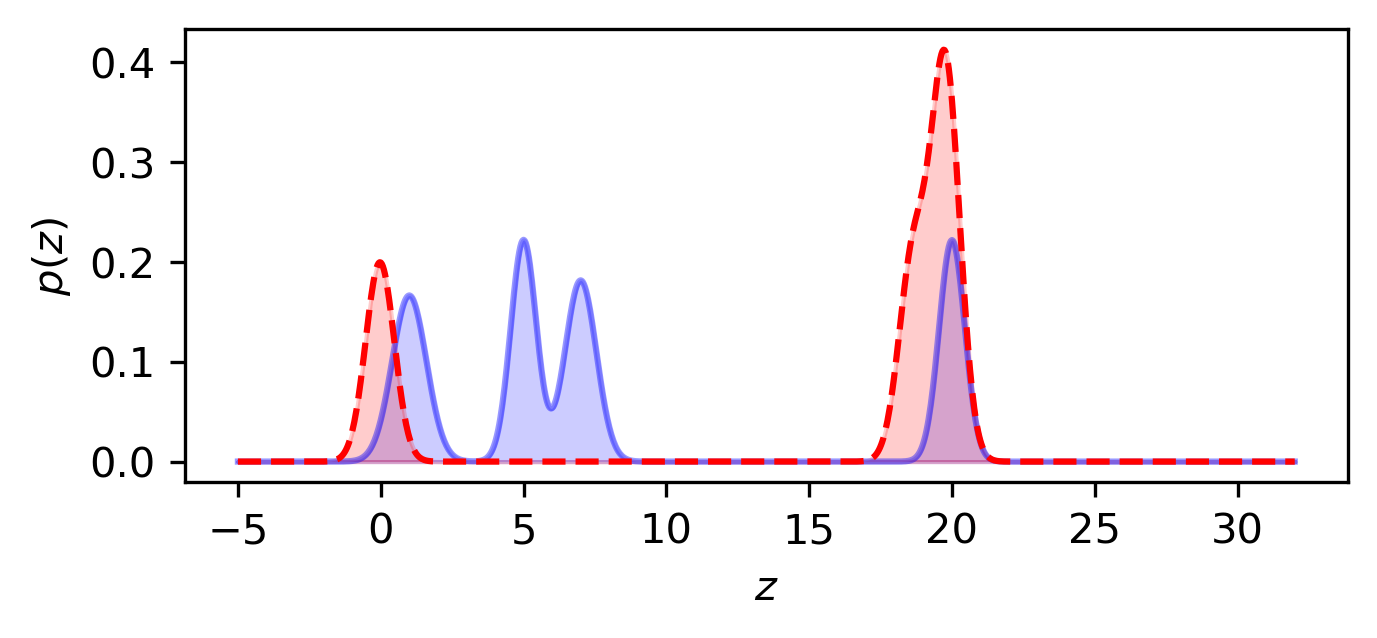

In [7]:
marginal_gains = []
plt.figure(figsize=(5, 2), dpi=300)
plt.fill_between(z_range, 0, density, color='blue', alpha=0.2)
plt.plot(z_range, density, 'blue', alpha=0.4)

plt.xlabel('$z$')
plt.ylabel('$p(z)$')


Z = []
for i in range(M):
    z_vals = []
    z_vals = -np.log(mixture(z_range, gt_means, gt_variances)) 
    new_best = np.random.choice(len(gt_means))
    Z.append(gt_means[new_best] + noise_level * np.random.randn(1)[0])

    left = Z[-1] - 3 * lambda_M
    right = Z[-1] + 3 * lambda_M
    z_plot = z_range[(z_range >= left) & (z_range <=right)]
    plt.plot(z_plot, gaussian(z_plot, Z[-1], lambda_M) / M, label='$K_{'f'{i+1}''}(z)$', color=colors[i], linestyle='--')

plt.legend()
plt.savefig('kernels_example_random.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(5, 2), dpi=300)
plt.fill_between(z_range, 0, density, color='blue', alpha=0.2)
plt.plot(z_range, density, 'blue', alpha=0.4)

plt.fill_between(z_range, 0, mixture(z_range, Z, [lambda_M,] * M), color='red', alpha=0.2)
plt.plot(z_range, mixture(z_range, Z, [lambda_M,] * M), 'r--')
plt.xlabel('$z$')
plt.ylabel('$p(z)$')
plt.savefig('approximation_example_random.pdf', bbox_inches='tight')
plt.show()